In [38]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import pickle
import torch.nn.functional as F
from torch.utils.data import Dataset
import pandas as pd
import random
import matplotlib.pyplot as plt
import pdb
import math
import copy

# RNN Learning Rate

In [49]:
with open('model/rnn-vi-lr-0001/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_lr0001 = pd.DataFrame(content).T
df_lr0001.columns=['index', 'train_loss0001', 'BLEU0001']
df_lr0001 = df_lr0001.set_index('index')

In [50]:
with open('model/rnn-vi-lr-001/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_lr001 = pd.DataFrame(content).T
df_lr001.columns=['index', 'train_loss001', 'BLEU001']
df_lr001 = df_lr001.set_index('index')

In [51]:
with open('model/rnn-vi-lr-01/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_lr01 = pd.DataFrame(content).T
df_lr01.columns=['index', 'train_loss01', 'BLEU01']
df_lr01 = df_lr01.set_index('index')

In [52]:
df_lr_results = df_lr01.merge(df_lr001, left_index=True, right_index=True).merge(df_lr0001, left_index=True, right_index=True)
df_lr_results.head()

df_lr_bleu = df_lr_results[['BLEU01', 'BLEU001', 'BLEU0001']]
df_lr_loss = df_lr_results[['train_loss01', 'train_loss001', 'train_loss0001']]


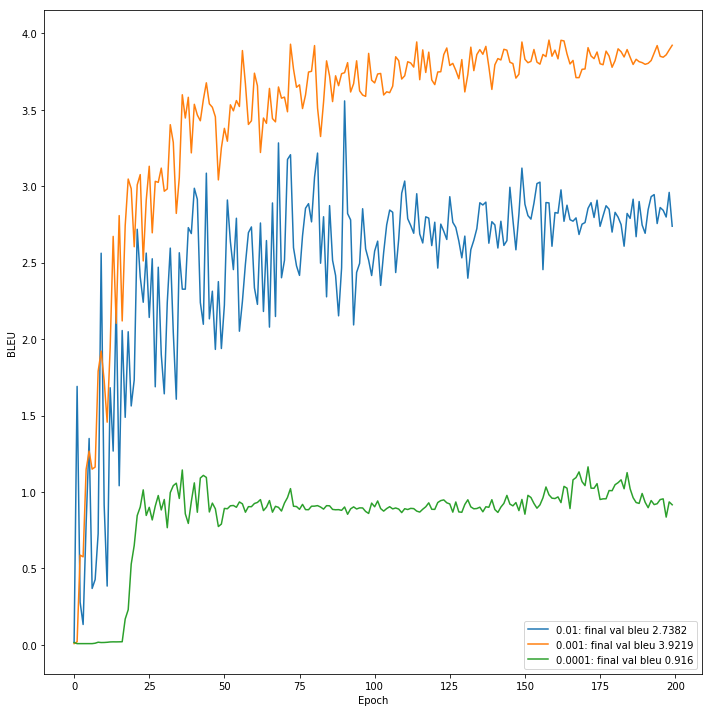

In [56]:
lr_results = []
lr_sizes = [0.01, 0.001, 0.0001]
for i in range(3):
    value = round(list(df_lr_bleu.iloc[-1])[i], 4)
    value = str(lr_sizes[i])+": final val bleu "+str(value)
    lr_results.append(value)
    
fig = plt.figure(figsize = (10,10))

plt.plot(df_lr_bleu)
plt.xlabel("Epoch")
plt.ylabel("BLEU")
plt.legend(lr_results, loc='lower right')
plt.tight_layout()
plt.savefig('rnn_vi_lr_bleu.png', dpi=300)
plt.show()

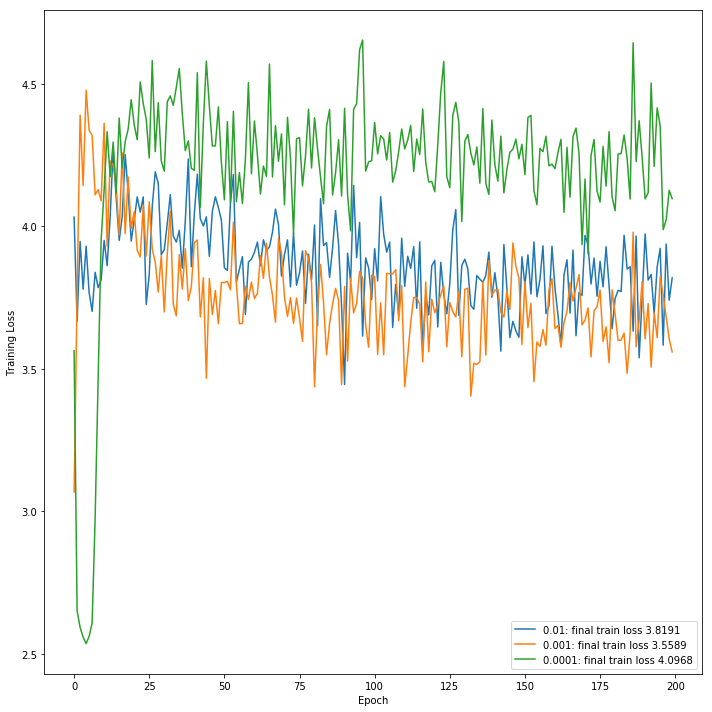

In [66]:
lr_results = []
lr_sizes = [0.01, 0.001, 0.0001]
for i in range(3):
    value = round(list(df_lr_loss.iloc[-1])[i], 4)
    value = str(lr_sizes[i])+": final train loss "+str(value)
    lr_results.append(value)
    
fig = plt.figure(figsize = (10,10))

plt.plot(df_lr_loss)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(lr_results, loc='best')
plt.tight_layout()
plt.savefig('rnn_vi_lr_loss.png', dpi=300)
plt.show()

# RNN Drop Rate

In [61]:
with open('model/rnn-vi-dr-0/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_dr0 = pd.DataFrame(content).T
df_dr0.columns=['index', 'train_loss0', 'BLEU0']
df_dr0 = df_dr0.set_index('index')

In [62]:
with open('model/rnn-vi-dr-3/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_dr3 = pd.DataFrame(content).T
df_dr3.columns=['index', 'train_loss3', 'BLEU3']
df_dr3 = df_dr3.set_index('index')

In [63]:
with open('model/rnn-vi-dr-6/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_dr6 = pd.DataFrame(content).T
df_dr6.columns=['index', 'train_loss6', 'BLEU6']
df_dr6 = df_dr6.set_index('index')

In [64]:
df_dr_results = df_dr0.merge(df_dr3, left_index=True, right_index=True).merge(df_dr6, left_index=True, right_index=True)
df_dr_results.head()

df_dr_bleu = df_dr_results[['BLEU0', 'BLEU3', 'BLEU6']]
df_dr_loss = df_dr_results[['train_loss0', 'train_loss3', 'train_loss6']]


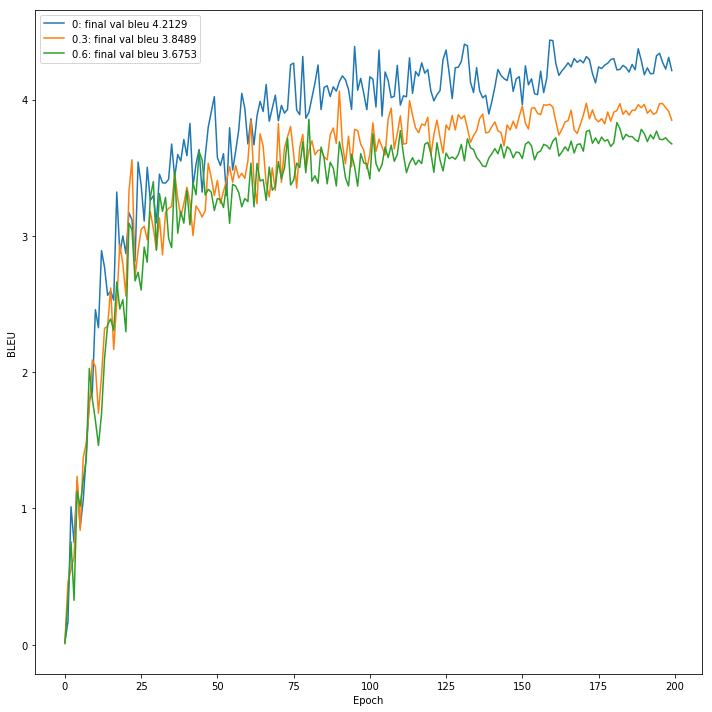

In [65]:
dr_results = []
dr = [0, 0.3, 0.6]
for i in range(3):
    value = round(list(df_dr_bleu.iloc[-1])[i], 4)
    value = str(dr[i])+": final val bleu "+str(value)
    dr_results.append(value)
    
fig = plt.figure(figsize = (10,10))

plt.plot(df_dr_bleu)
plt.xlabel("Epoch")
plt.ylabel("BLEU")
plt.legend(dr_results, loc='best')
plt.tight_layout()
plt.savefig('rnn_vi_dr_bleu.png', dpi=300)
plt.show()

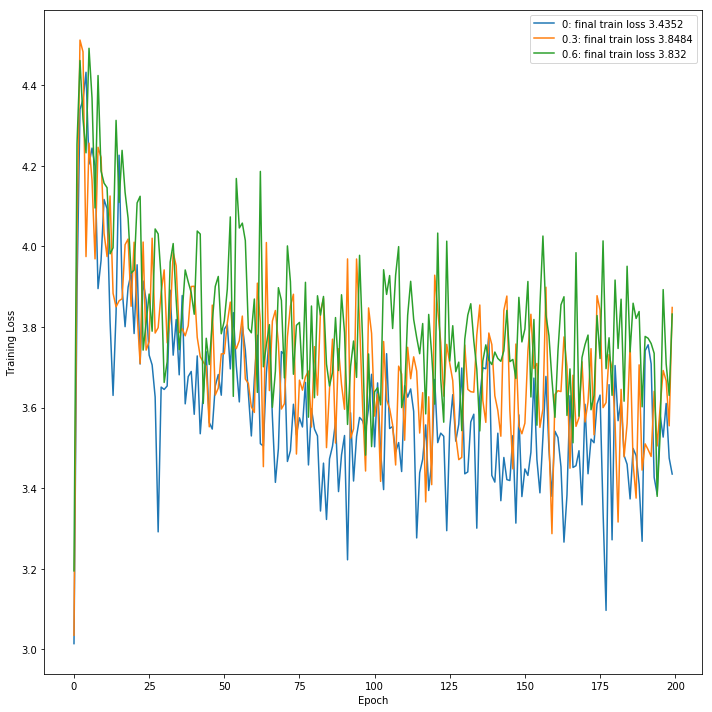

In [67]:
dr_results = []
dr = [0, 0.3, 0.6]
for i in range(3):
    value = round(list(df_dr_loss.iloc[-1])[i], 4)
    value = str(dr[i])+": final train loss "+str(value)
    dr_results.append(value)
    
fig = plt.figure(figsize = (10,10))

plt.plot(df_dr_loss)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(dr_results, loc='best')
plt.tight_layout()
plt.savefig('rnn_vi_dr_loss.png', dpi=300)
plt.show()